In [1]:
#Download neccessary dependencies to start analysis.

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [159]:
# The code was removed by Watson Studio for sharing.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [160]:
#replace Yes and No to 1 and 0
for columns in df_data_1:
    dummies = df_data_1.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)

In [161]:
df_data_1.gender.replace(to_replace=['Female', 'Male'], value=[0, 1],inplace=True)
df_data_1.InternetService.replace(to_replace=['DSL', 'Fiber optic'], value=[1, 2],inplace=True)

In [167]:
df_data_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,NaN,1,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0.0,1,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0.0,1,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,NaN,1,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0.0,2,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,1.0,2,0,...,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1
6,1452-KIOVK,1,0,0,1,22,1,1.0,2,0,...,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,0,0,0,0,10,0,NaN,1,1,...,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0
8,7892-POOKP,0,0,1,0,28,1,1.0,2,0,...,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0.0,1,1,...,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [177]:
df_data_1.replace(to_replace='No phone service', value=np.NaN, inplace=True)
df_data_1.replace(to_replace='No internet service', value=np.NaN, inplace=True)
df_data_1.dropna(axis=0, inplace=True)
df_data_1.reset_index(drop = True, inplace = True)

In [194]:
print(df_data_1.columns)
print(df_data_1.dtypes)
print(df_data_1.shape)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'Churn'],
      dtype='object')
customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines       float64
InternetService       int64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
PaperlessBilling      int64
MonthlyCharges      float64
Churn                 int64
dtype: object
(4835, 18)


In [195]:
#Define X for dataset
X = np.asarray(df_data_1[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges']])
X[0:5]

array([[  1.  ,   0.  ,   0.  ,   0.  ,  34.  ,   1.  ,   0.  ,   1.  ,
          1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,  56.95],
       [  1.  ,   0.  ,   0.  ,   0.  ,   2.  ,   1.  ,   0.  ,   1.  ,
          1.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,  53.85],
       [  0.  ,   0.  ,   0.  ,   0.  ,   2.  ,   1.  ,   0.  ,   2.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,  70.7 ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   8.  ,   1.  ,   1.  ,   2.  ,
          0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   1.  ,   1.  ,  99.65],
       [  1.  ,   0.  ,   0.  ,   1.  ,  22.  ,   1.  ,   1.  ,   2.  ,
          0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ,  89.1 ]])

In [196]:
#Define Y for dataset
y = np.asarray(df_data_1['Churn'])
y [0:5]

array([0, 1, 1, 1, 0])

In [197]:
#Normalize the dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.99690242, -0.50613282, -0.97366616, -0.59399155,  0.03911587,
         0.        , -1.09167292, -1.33429139,  1.33609066, -0.89184947,
         1.13308971, -0.75485442, -1.00186316, -1.00684868, -1.49324911,
        -1.3553855 ],
       [ 0.99690242, -0.50613282, -0.97366616, -0.59399155, -1.25959803,
         0.        , -1.09167292, -1.33429139,  1.33609066,  1.12126546,
        -0.88254265, -0.75485442, -1.00186316, -1.00684868,  0.66968062,
        -1.52477337],
       [-1.00310721, -0.50613282, -0.97366616, -0.59399155, -1.25959803,
         0.        , -1.09167292,  0.74946148, -0.74845221, -0.89184947,
        -0.88254265, -0.75485442, -1.00186316, -1.00684868,  0.66968062,
        -0.60406833],
       [-1.00310721, -0.50613282, -0.97366616, -0.59399155, -1.01608918,
         0.        ,  0.91602528,  0.74946148, -0.74845221, -0.89184947,
         1.13308971, -0.75485442,  0.9981403 ,  0.9931979 ,  0.66968062,
         0.97779582],
       [ 0.99690242, -0.50613282, -0

In [198]:
#Split dataset into train/test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3868, 16) (3868,)
Test set: (967, 16) (967,)


Model using __LogisticRegression__ from Scikit-learn package. 
This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. 

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 

In [199]:
#Logistic Regression
#Fit model with train set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [200]:
#Predict using test set
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0,

In [201]:
#__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[ 0.59331583,  0.40668417],
       [ 0.58324704,  0.41675296],
       [ 0.89360655,  0.10639345],
       ..., 
       [ 0.8547943 ,  0.1452057 ],
       [ 0.86176304,  0.13823696],
       [ 0.35244897,  0.64755103]])

In [202]:
#Evaluation

#Jaccard Index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.76938986556359878

In [203]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[193 129]
 [ 94 551]]


Confusion matrix, without normalization
[[193 129]
 [ 94 551]]


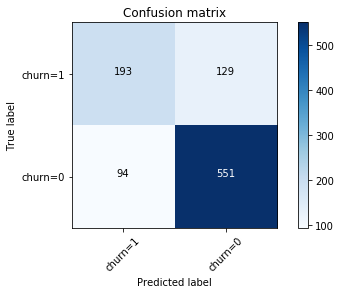

In [204]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [205]:
print (classification_report(y_test, yhat))

             precision    recall  f1-score   support

          0       0.81      0.85      0.83       645
          1       0.67      0.60      0.63       322

avg / total       0.76      0.77      0.77       967



In [206]:
#Log Loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.49974926212912107